In [2]:
from python.optimization import TopOpt
from python.postprocessor import PostProcessor

ANSYS_path = "C:\\Program Files\\ANSYS Inc\\v202\\ansys\\bin\\winx64\\MAPDL.exe"
script_dir = "D:\\SOMP_Ansys\\python\\"
res_dir    = "D:\\SOMP_Ansys\\results\\"
mod_dir    = "D:\\SOMP_Ansys\\models\\"
TopOpt.load_paths(ANSYS_path, script_dir, res_dir, mod_dir)
# TopOpt.set_processors(2)

# Base
- MBB 30 mm x 15 mm (10 N force)
- 30 x 15 mesh
- Cellulose and 0.5 bamboo
- volfrac = 0.3
- rmin = 1.5
- theta0 = -73.6°

In [3]:
# fiber: bamboo
rhofiber  = 700e-12 # t/mm^3
Efiber    = 17.5e3 # MPa
vfiber    = 0.04
CO2fiber  = 1.0565 # kgCO2/kg

# matrix: cellulose
rhomatrix = 990e-12 # t/mm^3
Ematrix   = 3.25e3
vmatrix   = 0.355 # MPa
CO2matrix = 3.8 # kgCO2/kg

Vfiber  = 0.5
Vmatrix = 1-Vfiber

Gfiber  = Efiber/(2*(1+vfiber))
Gmatrix = Ematrix/(2*(1+vmatrix))

Ex  = Efiber*Vfiber + Ematrix*Vmatrix
Ey  = Efiber*Ematrix / (Efiber*Vmatrix + Ematrix*Vfiber)
Gxy = Gfiber*Gmatrix / (Gfiber*Vmatrix + Gmatrix*Vfiber)
nu  = vfiber*Vfiber + vmatrix*Vmatrix
rho = rhofiber*Vfiber + rhomatrix*Vmatrix

In [7]:
solver1 = TopOpt(inputfile='mbb30_15', Ex=Ex, Ey=Ey, Gxy=Gxy, nu=nu, volfrac=0.3, rmin=1.5, theta0=-73.6)
solver1.optim()

print('\nElapsed time: {:.2f}s'.format(solver1.time))

Starting iteration   1... compliance = 29.2542
Starting iteration   2... compliance = 21.4600
Starting iteration   3... compliance = 16.2775
Starting iteration   4... compliance = 13.6905
Starting iteration   5... compliance = 12.0259
Starting iteration   6... compliance = 10.7641
Starting iteration   7... compliance = 9.8170
Starting iteration   8... compliance = 9.0151
Starting iteration   9... compliance = 8.4912
Starting iteration  10... compliance = 7.9309
Starting iteration  11... compliance = 6.8020
Starting iteration  12... compliance = 6.4786
Starting iteration  13... compliance = 6.2448
Starting iteration  14... compliance = 5.6582
Starting iteration  15... compliance = 5.5757
Starting iteration  16... compliance = 5.2274
Starting iteration  17... compliance = 4.9069
Starting iteration  18... compliance = 5.0410
Starting iteration  19... compliance = 5.2753
Starting iteration  20... compliance = 5.9143
Starting iteration  21... compliance = 5.6686
Starting iteration  22... co

CO2 footprint: 11.24 kgCO2


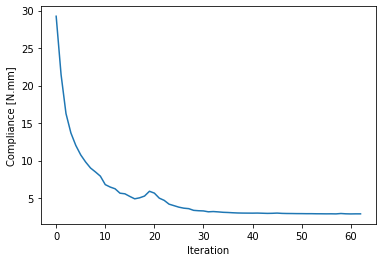

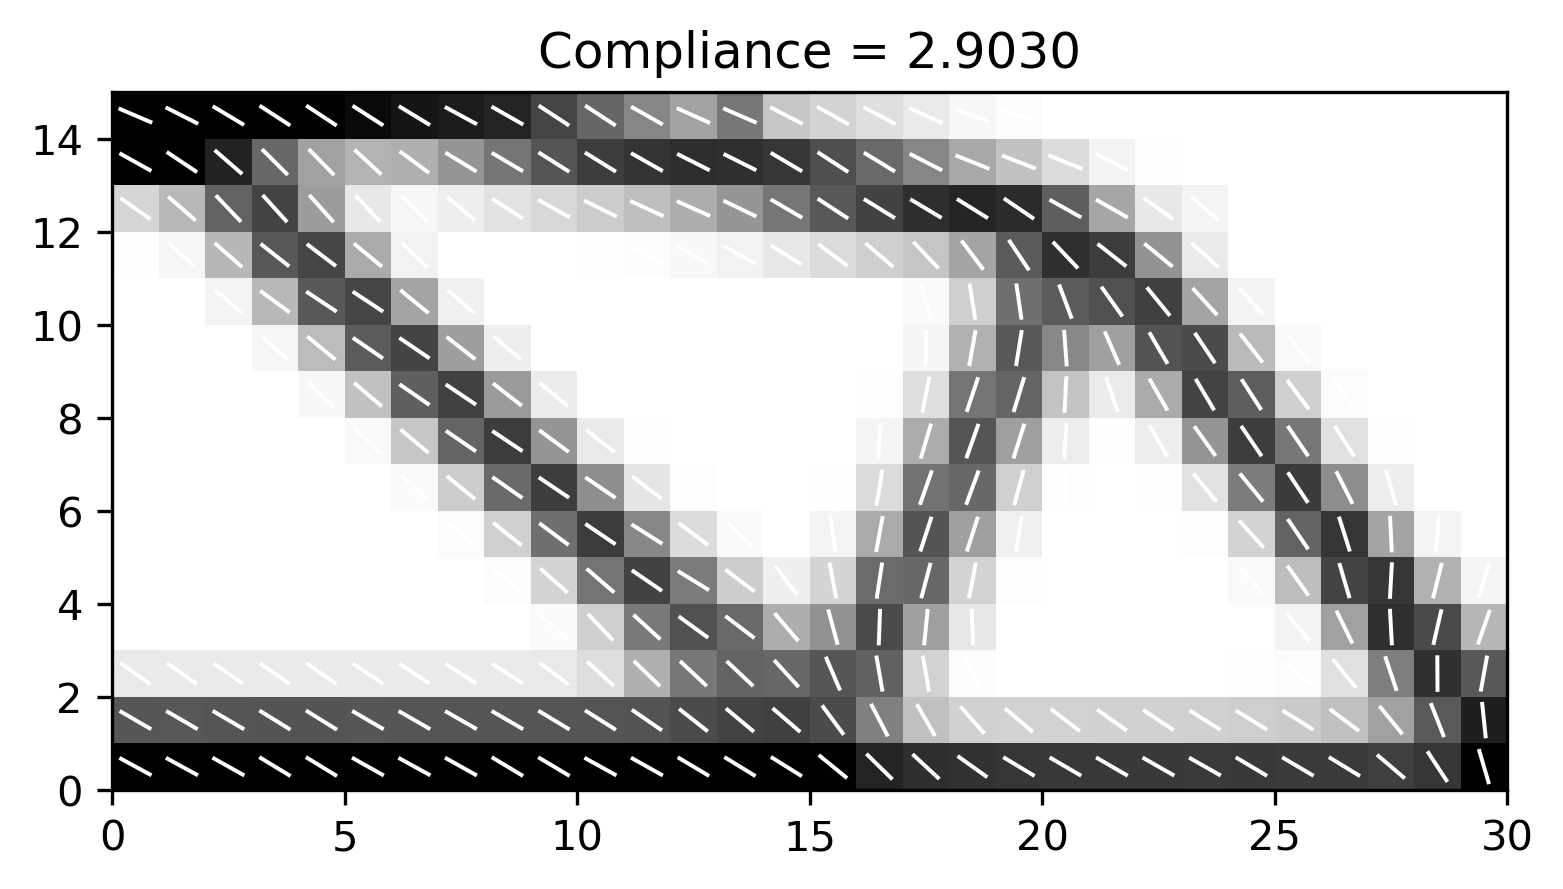

In [8]:
post1 = PostProcessor(solver1)
post1.plot_convergence()
post1.plot()

CO2mat = (rhofiber*Vfiber*CO2fiber + rhomatrix*Vmatrix*CO2matrix)/rho # kgCO2/kg
CO2veh = 1030 * 25 * 3.83 # kg_fuel/kg_transported/year * years * kgCO2/kg_fuel = kgCO2/kg
print('CO2 footprint: {:.2f} kgCO2'.format(1000 * post1.CO2_footprint(rho, CO2mat, CO2veh)))

# Initial angle dependence
- MBB 30 mm x 15 mm
- 30 x 15 mesh
- Cellulose and 0.5 bamboo
- volfrac = 0.3
- rmin = 1.5
- theta0 = -40.9°

In [14]:
solver2 = TopOpt(inputfile='mbb30_15', Ex=Ex, Ey=Ey, Gxy=Gxy, nu=nu, volfrac=0.3, rmin=1.5, theta0=-40.9)
solver2.optim()

print('\nElapsed time: {:.2f}s'.format(solver2.time))

Starting iteration   1... compliance = 26.6227
Starting iteration   2... compliance = 18.2514
Starting iteration   3... compliance = 13.1153
Starting iteration   4... compliance = 10.6918
Starting iteration   5... compliance = 9.4737
Starting iteration   6... compliance = 8.5761
Starting iteration   7... compliance = 7.9507
Starting iteration   8... compliance = 7.3810
Starting iteration   9... compliance = 6.9223
Starting iteration  10... compliance = 6.0544
Starting iteration  11... compliance = 5.8487
Starting iteration  12... compliance = 5.3903
Starting iteration  13... compliance = 5.5999
Starting iteration  14... compliance = 5.0636
Starting iteration  15... compliance = 4.5399
Starting iteration  16... compliance = 4.7438
Starting iteration  17... compliance = 4.5190
Starting iteration  18... compliance = 4.1670
Starting iteration  19... compliance = 4.2974
Starting iteration  20... compliance = 4.0737
Starting iteration  21... compliance = 4.2507
Starting iteration  22... comp

CO2 footprint: 11.14 kgCO2


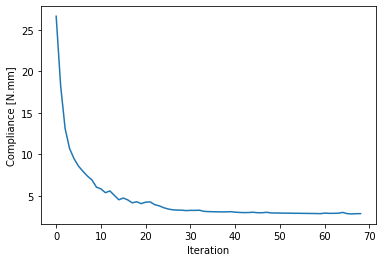

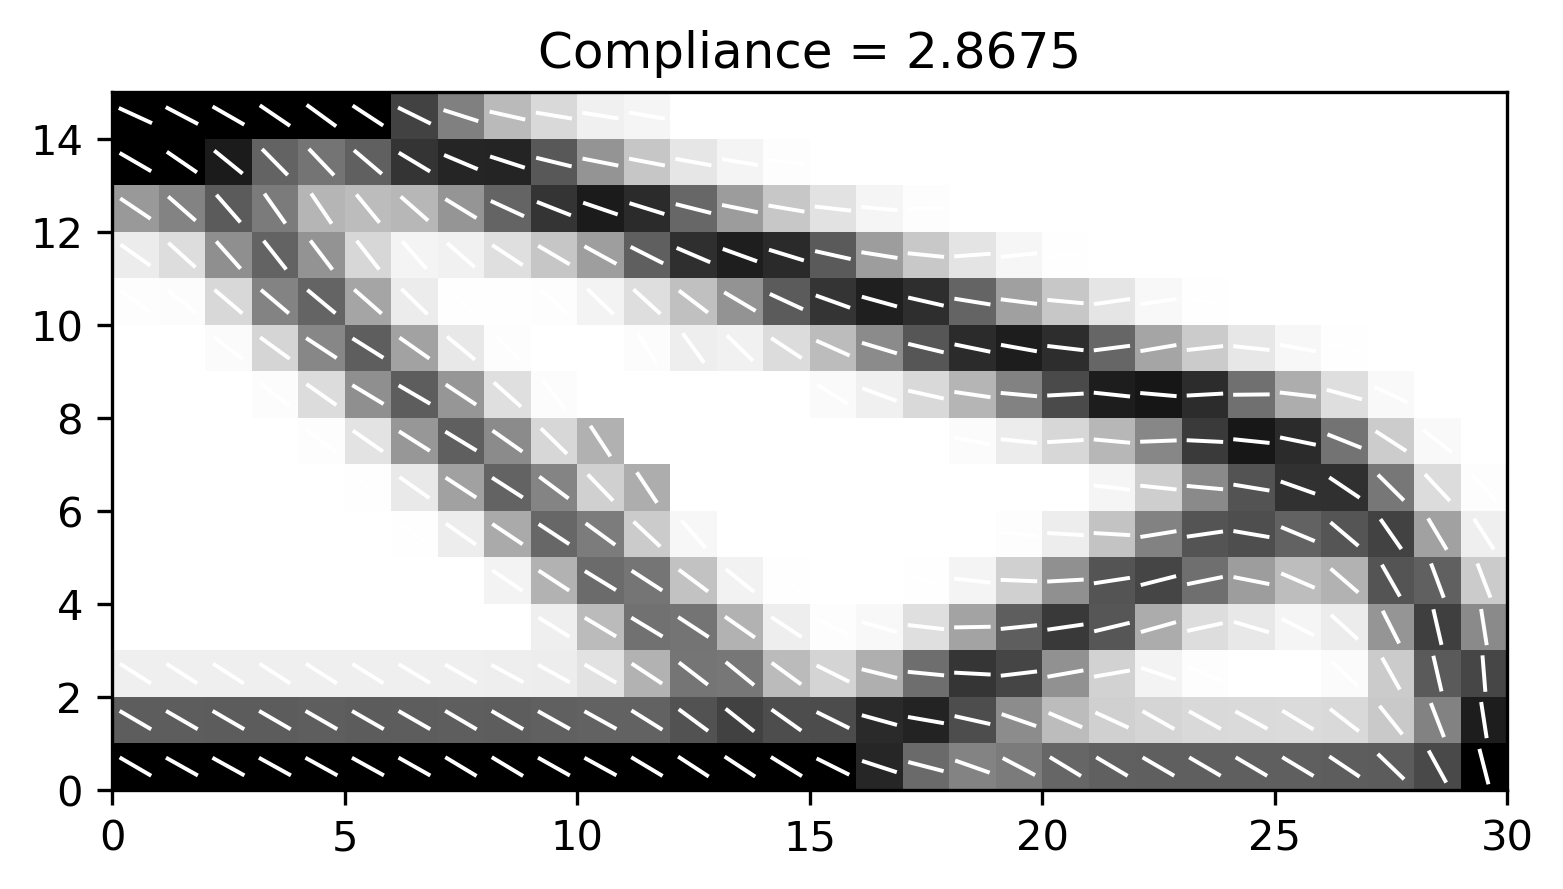

In [15]:
post2 = PostProcessor(solver2)
post2.plot_convergence()
post2.plot()

print('CO2 footprint: {:.2f} kgCO2'.format(1000 * post2.CO2_footprint(rho, CO2mat, CO2veh)))

# Mesh independence
- MBB 30 mm x 15 mm
- 60 x 30 mesh
- Cellulose and 0.5 bamboo
- volfrac = 0.3
- rmin = 1.5
- theta0 = -73.6°

In [22]:
solver3 = TopOpt(inputfile='mbb60_30', Ex=Ex, Ey=Ey, Gxy=Gxy, nu=nu, volfrac=0.3, rmin=1.5, theta0=-73.6)
solver3.optim()

print('\nElapsed time: {:.2f}s'.format(solver3.time))

Starting iteration   1... compliance = 30.3217
Starting iteration   2... compliance = 21.8213
Starting iteration   3... compliance = 16.4328
Starting iteration   4... compliance = 13.7686
Starting iteration   5... compliance = 12.0560
Starting iteration   6... compliance = 10.7615
Starting iteration   7... compliance = 9.7225
Starting iteration   8... compliance = 9.0050
Starting iteration   9... compliance = 8.4826
Starting iteration  10... compliance = 7.7452
Starting iteration  11... compliance = 6.9947
Starting iteration  12... compliance = 6.5325
Starting iteration  13... compliance = 6.4945
Starting iteration  14... compliance = 5.8324
Starting iteration  15... compliance = 5.5686
Starting iteration  16... compliance = 5.4807
Starting iteration  17... compliance = 5.1157
Starting iteration  18... compliance = 5.0542
Starting iteration  19... compliance = 5.7070
Starting iteration  20... compliance = 5.5260
Starting iteration  21... compliance = 5.7623
Starting iteration  22... co

CO2 footprint: 11.24 kgCO2


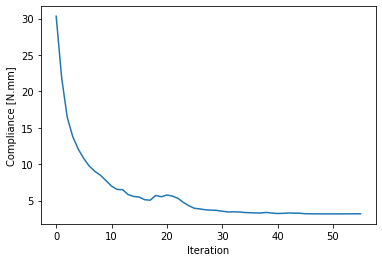

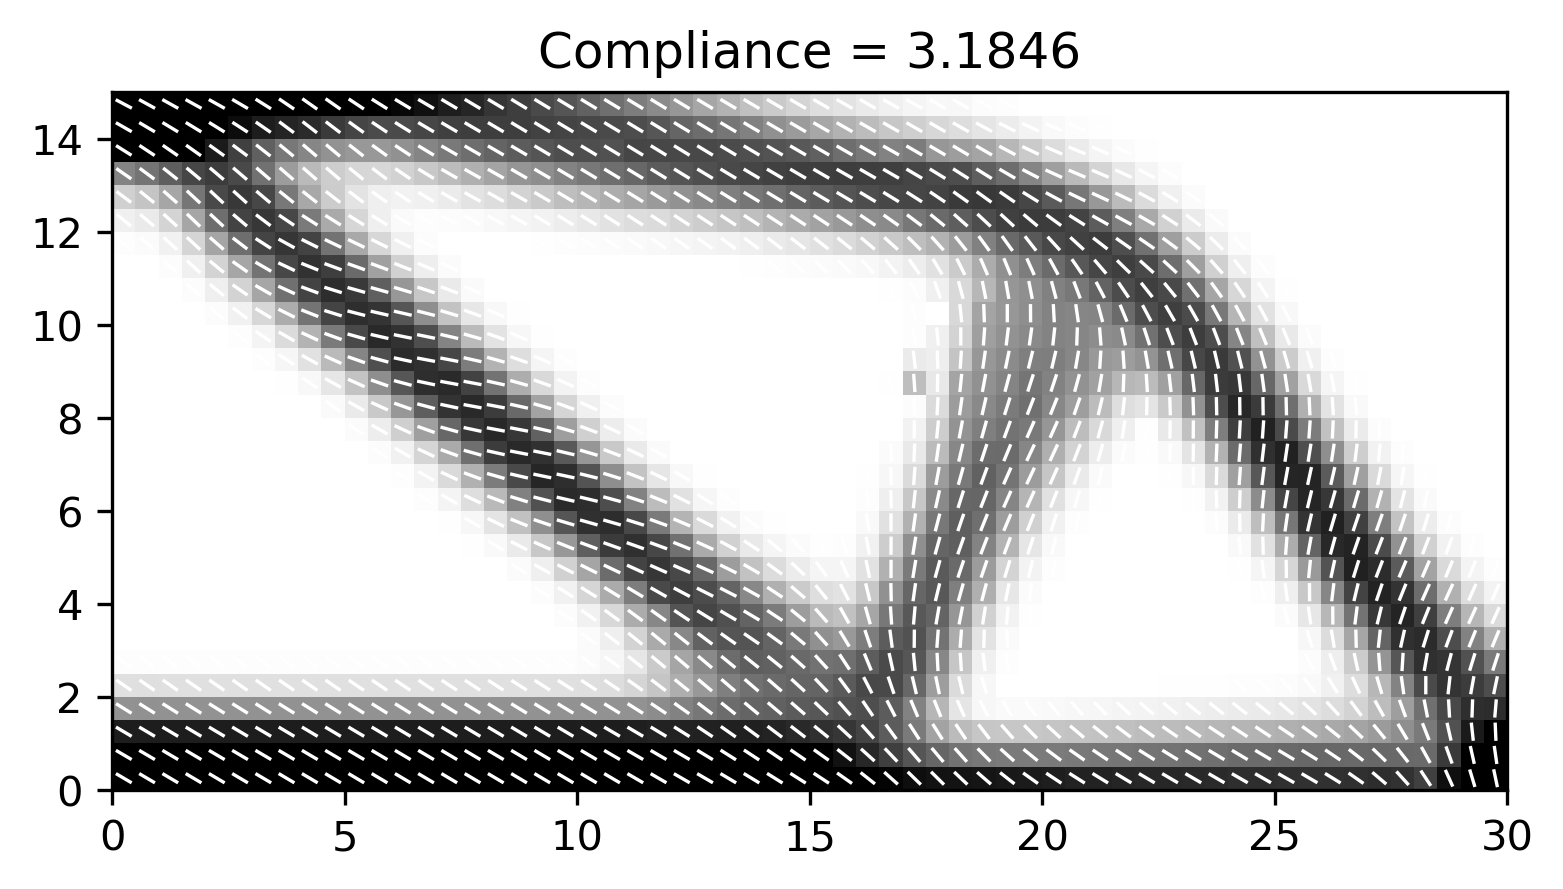

In [23]:
post3 = PostProcessor(solver3)
post3.plot_convergence()
post3.plot()

print('CO2 footprint: {:.2f} kgCO2'.format(1000 * post3.CO2_footprint(rho, CO2mat, CO2veh)))

# Filter radius dependence
- MBB 30 mm x 15 mm
- 120 x 60 mesh
- Cellulose and 0.5 bamboo
- volfrac = 0.3
- rmin = 0.5
- theta0 = -73.6°

In [26]:
solver4 = TopOpt(inputfile='mbb120_60', Ex=Ex, Ey=Ey, Gxy=Gxy, nu=nu, volfrac=0.3, rmin=0.5, theta0=-73.6)
solver4.optim()

print('\nElapsed time: {:.2f}s'.format(solver4.time))

Starting iteration   1... compliance = 31.3453
Starting iteration   2... compliance = 22.0490
Starting iteration   3... compliance = 16.3941
Starting iteration   4... compliance = 13.5368
Starting iteration   5... compliance = 11.6601
Starting iteration   6... compliance = 10.1969
Starting iteration   7... compliance = 9.0266
Starting iteration   8... compliance = 8.0841
Starting iteration   9... compliance = 7.3285
Starting iteration  10... compliance = 6.5689
Starting iteration  11... compliance = 5.9629
Starting iteration  12... compliance = 5.4958
Starting iteration  13... compliance = 5.1043
Starting iteration  14... compliance = 4.8939
Starting iteration  15... compliance = 4.7103
Starting iteration  16... compliance = 4.3505
Starting iteration  17... compliance = 4.0130
Starting iteration  18... compliance = 3.5097
Starting iteration  19... compliance = 3.1613
Starting iteration  20... compliance = 2.8046
Starting iteration  21... compliance = 2.5442
Starting iteration  22... co

CO2 footprint: 11.22 kgCO2


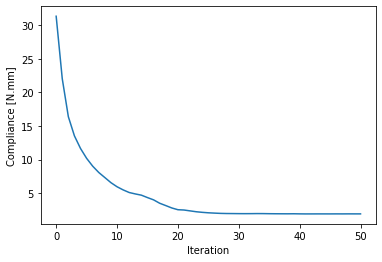

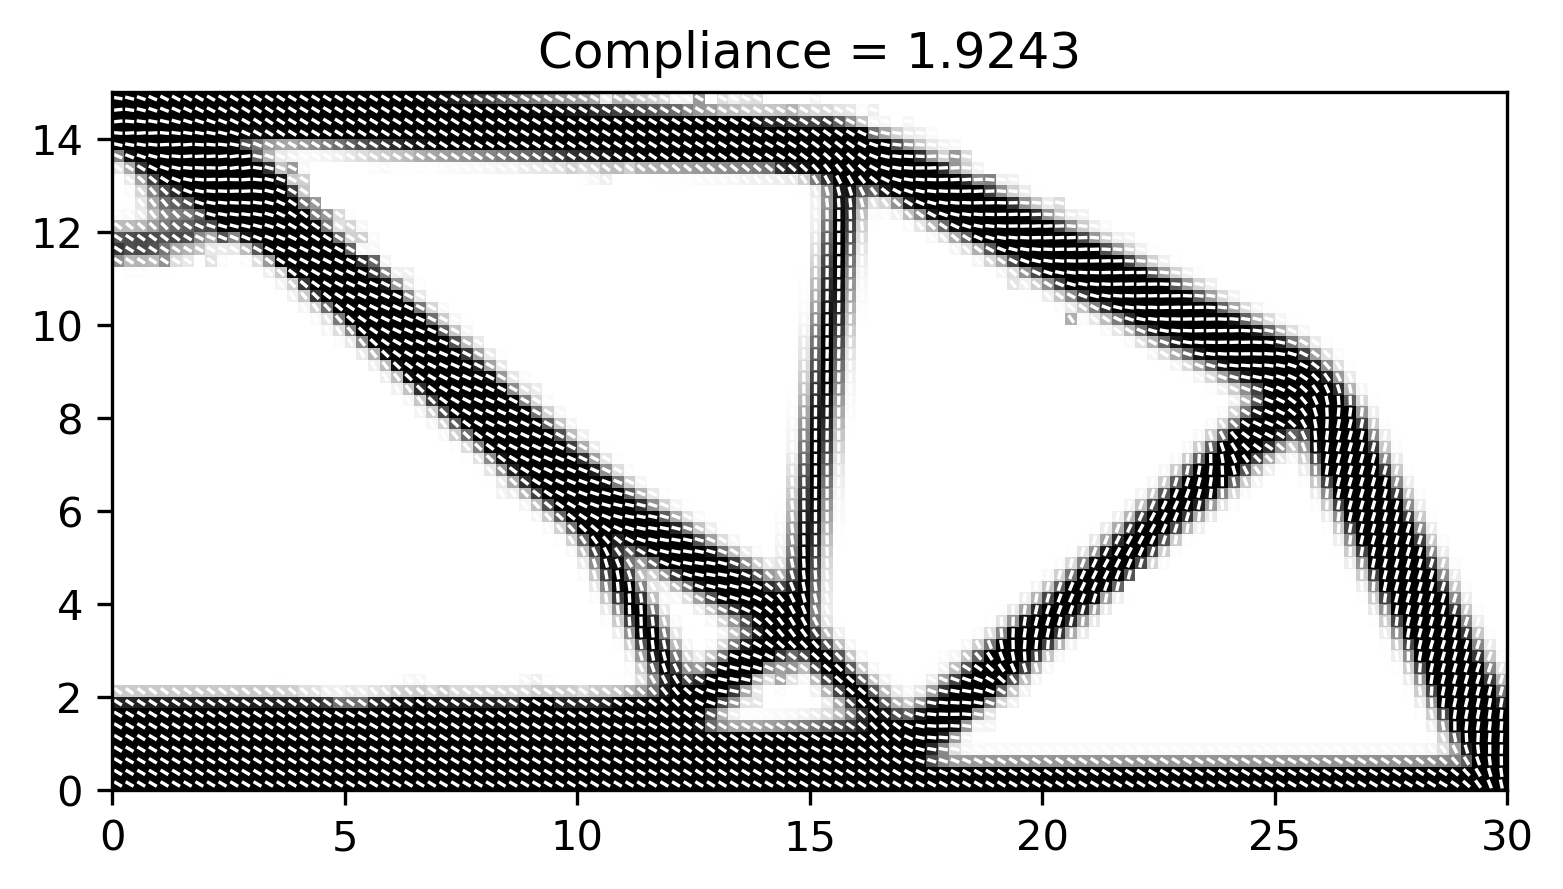

In [27]:
post4 = PostProcessor(solver4)
post4.plot_convergence()
post4.plot()

print('CO2 footprint: {:.2f} kgCO2'.format(1000 * post4.CO2_footprint(rho, CO2mat, CO2veh)))

# Change volfrac
- MBB 30 mm x 15 mm
- 30 x 15 mesh
- Cellulose and 0.5 bamboo
- volfrac = 0.2
- rmin = 1.5
- theta0 = -73.6°

In [28]:
solver5 = TopOpt(inputfile='mbb30_15', Ex=Ex, Ey=Ey, Gxy=Gxy, nu=nu, volfrac=0.2, rmin=1.5, theta0=-73.6)
solver5.optim()

print('\nElapsed time: {:.2f}s'.format(solver5.time))

Starting iteration   1... compliance = 98.7329
Starting iteration   2... compliance = 68.0890
Starting iteration   3... compliance = 48.0997
Starting iteration   4... compliance = 40.2021
Starting iteration   5... compliance = 35.2491
Starting iteration   6... compliance = 32.0198
Starting iteration   7... compliance = 29.4986
Starting iteration   8... compliance = 26.9403
Starting iteration   9... compliance = 25.0310
Starting iteration  10... compliance = 23.7015
Starting iteration  11... compliance = 21.9380
Starting iteration  12... compliance = 19.6857
Starting iteration  13... compliance = 17.4465
Starting iteration  14... compliance = 16.0523
Starting iteration  15... compliance = 17.1872
Starting iteration  16... compliance = 17.7759
Starting iteration  17... compliance = 30.3636
Starting iteration  18... compliance = 42.3270
Starting iteration  19... compliance = 49.1683
Starting iteration  20... compliance = 39.5766
Starting iteration  21... compliance = 24.5584
Starting iter

CO2 footprint: 7.48 kgCO2


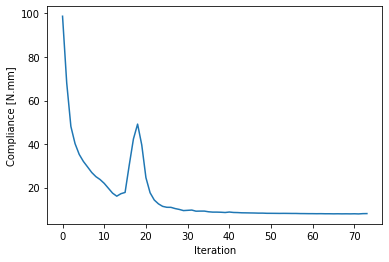

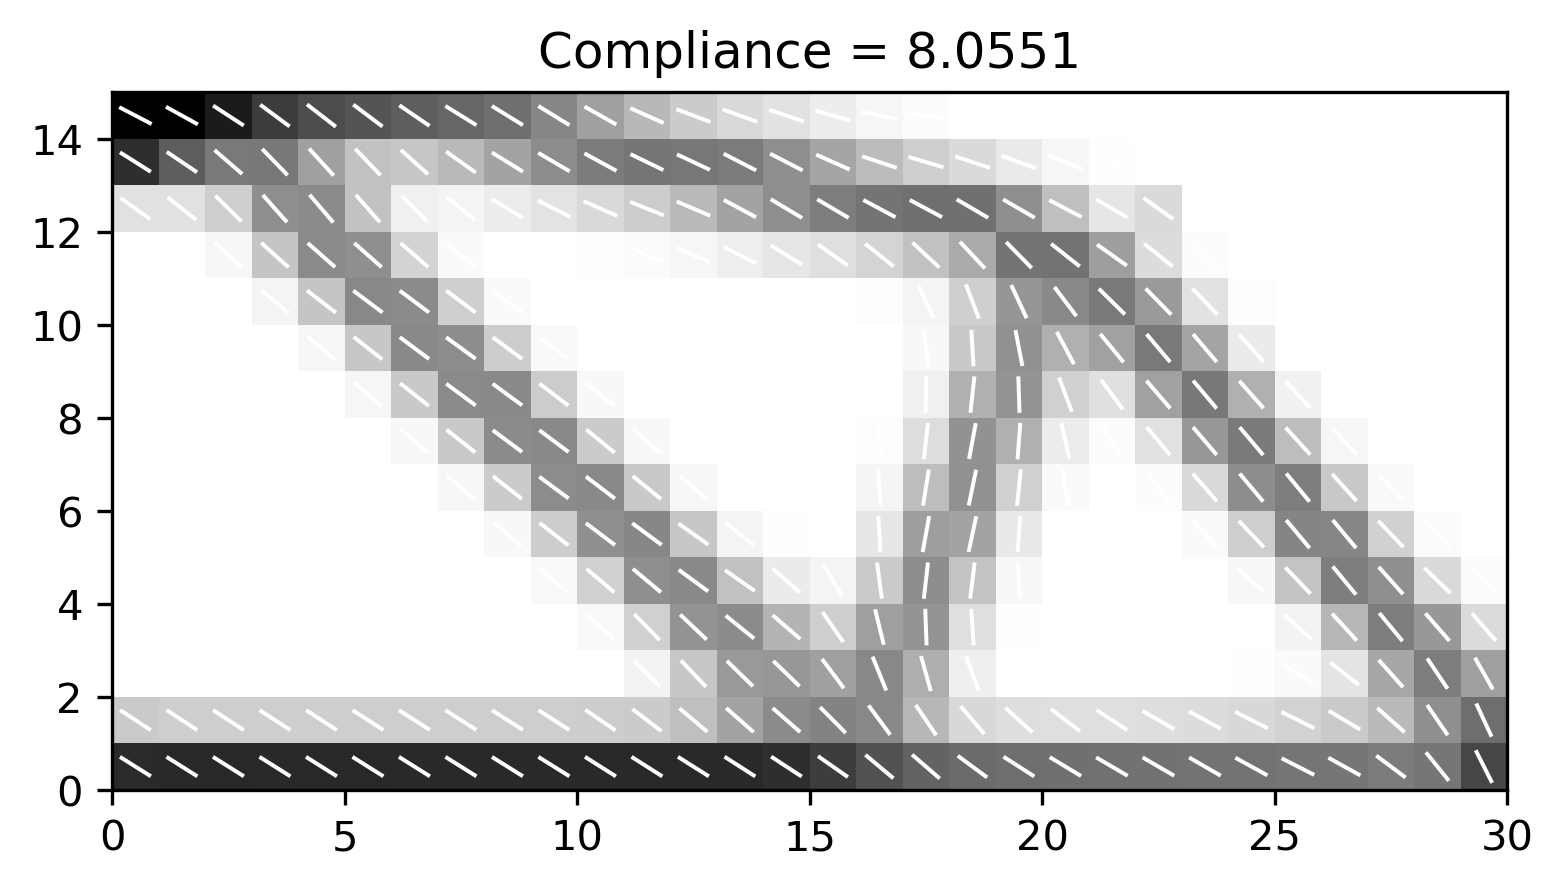

In [29]:
post5 = PostProcessor(solver5)
post5.plot_convergence()
post5.plot()

print('CO2 footprint: {:.2f} kgCO2'.format(1000 * post5.CO2_footprint(rho, CO2mat, CO2veh)))

# Change fiber volume fraction
- MBB 30 mm x 15 mm
- 30 x 15 mesh
- Cellulose and 0.25 bamboo
- volfrac = 0.3
- rmin = 1.5
- theta0 = -73.6°

In [30]:
Vfiber  = 0.25
Vmatrix = 1-Vfiber

Ex  = Efiber*Vfiber + Ematrix*Vmatrix
Ey  = Efiber*Ematrix / (Efiber*Vmatrix + Ematrix*Vfiber)
Gxy = Gfiber*Gmatrix / (Gfiber*Vmatrix + Gmatrix*Vfiber)
nu  = vfiber*Vfiber + vmatrix*Vmatrix
rho = rhofiber*Vfiber + rhomatrix*Vmatrix

In [31]:
solver6 = TopOpt(inputfile='mbb30_15', Ex=Ex, Ey=Ey, Gxy=Gxy, nu=nu, volfrac=0.3, rmin=1.5, theta0=-73.6)
solver6.optim()

print('\nElapsed time: {:.2f}s'.format(solver6.time))

Starting iteration   1... compliance = 39.7903
Starting iteration   2... compliance = 29.2614
Starting iteration   3... compliance = 22.3044
Starting iteration   4... compliance = 18.8470
Starting iteration   5... compliance = 16.6319
Starting iteration   6... compliance = 14.9417
Starting iteration   7... compliance = 13.7273
Starting iteration   8... compliance = 12.6068
Starting iteration   9... compliance = 11.8420
Starting iteration  10... compliance = 11.3739
Starting iteration  11... compliance = 9.8782
Starting iteration  12... compliance = 9.5824
Starting iteration  13... compliance = 8.6946
Starting iteration  14... compliance = 8.3287
Starting iteration  15... compliance = 8.1358
Starting iteration  16... compliance = 7.5816
Starting iteration  17... compliance = 7.6248
Starting iteration  18... compliance = 7.7319
Starting iteration  19... compliance = 7.9229
Starting iteration  20... compliance = 8.0146
Starting iteration  21... compliance = 7.8995
Starting iteration  22..

CO2 footprint: 12.13 kgCO2


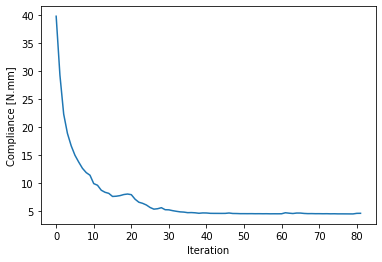

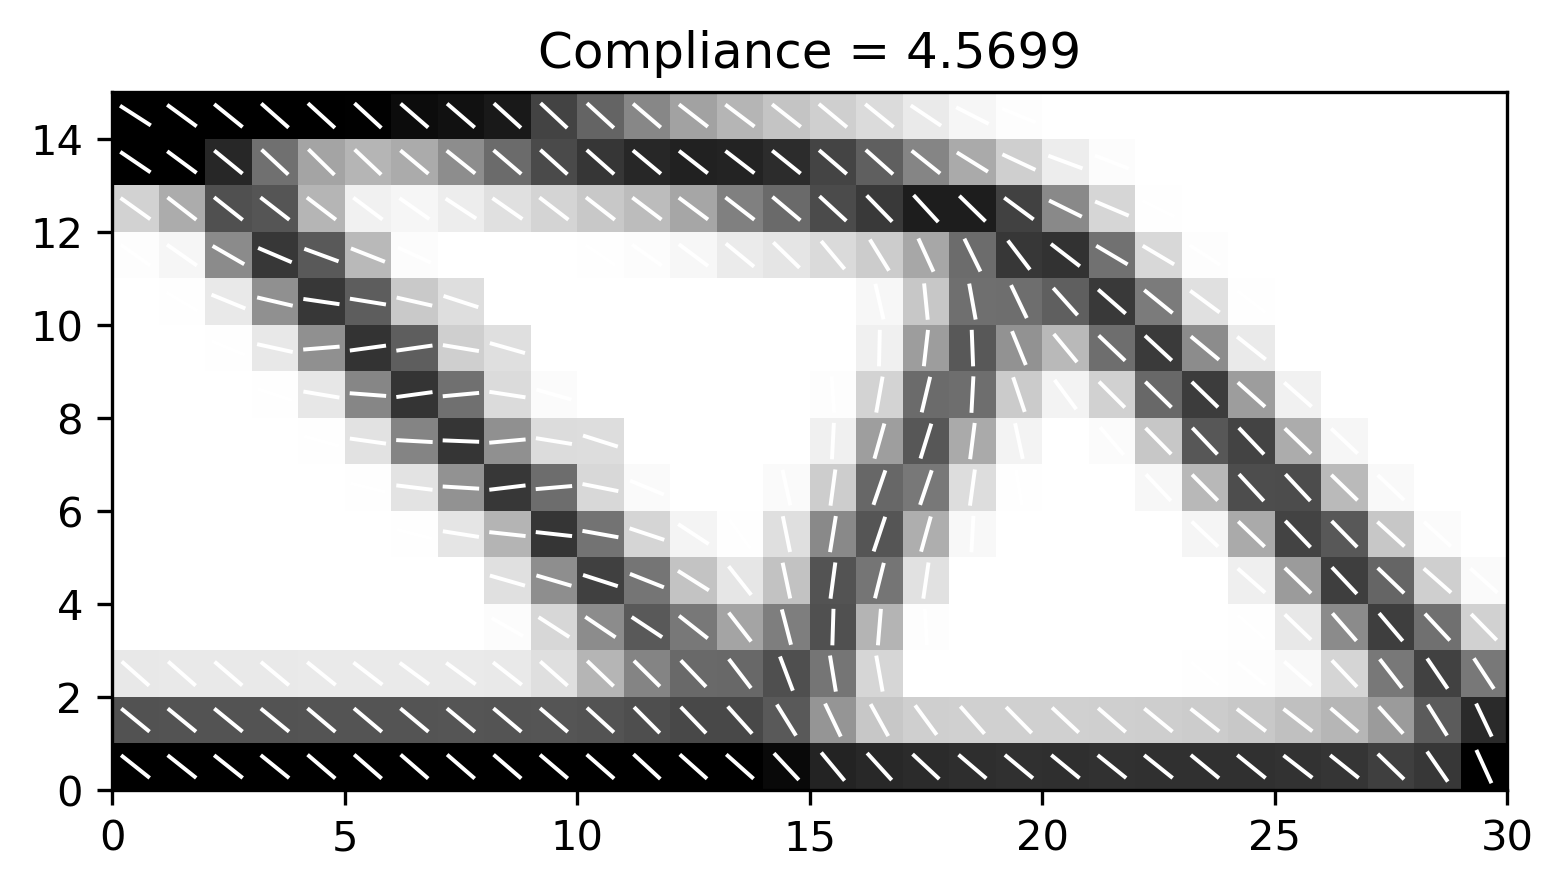

In [32]:
post6 = PostProcessor(solver6)
post6.plot_convergence()
post6.plot()

CO2mat = (rhofiber*Vfiber*CO2fiber + rhomatrix*Vmatrix*CO2matrix)/rho # kgCO2/kg
print('CO2 footprint: {:.2f} kgCO2'.format(1000 * post6.CO2_footprint(rho, CO2mat, CO2veh)))

# Change material
- MBB 30 mm x 15 mm
- 30 x 15 mesh
- Epoxy and 0.25 E-glass
- volfrac = 0.3
- rmin = 1.5
- theta0 = -73.6°

In [34]:
# fiber: E-glass
rhofiber  = 2575e-12 # t/mm^3
Efiber    = 78.5e3 # MPa
vfiber    = 0.22
CO2fiber  = 2.45 # kgCO2/kg

# matrix: epoxy
rhomatrix = 1255e-12 # t/mm^3
Ematrix   = 2.41e3 # MPa
vmatrix   = 0.399
CO2matrix = 5.94 # kgCO2/kg

Vfiber  = 0.25
Vmatrix = 1-Vfiber

Gfiber  = Efiber/(2*(1+vfiber))
Gmatrix = Ematrix/(2*(1+vmatrix))

Ex  = Efiber*Vfiber + Ematrix*Vmatrix
Ey  = Efiber*Ematrix / (Efiber*Vmatrix + Ematrix*Vfiber)
Gxy = Gfiber*Gmatrix / (Gfiber*Vmatrix + Gmatrix*Vfiber)
nu  = vfiber*Vfiber + vmatrix*Vmatrix
rho = rhofiber*Vfiber + rhomatrix*Vmatrix

In [35]:
solver7 = TopOpt(inputfile='mbb30_15', Ex=Ex, Ey=Ey, Gxy=Gxy, nu=nu, volfrac=0.3, rmin=1.5, theta0=-73.6)
solver7.optim()

print('\nElapsed time: {:.2f}s'.format(solver7.time))

Starting iteration   1... compliance = 46.4122
Starting iteration   2... compliance = 34.2855
Starting iteration   3... compliance = 25.5457
Starting iteration   4... compliance = 20.9014
Starting iteration   5... compliance = 17.7517
Starting iteration   6... compliance = 15.1938
Starting iteration   7... compliance = 13.2334
Starting iteration   8... compliance = 11.5178
Starting iteration   9... compliance = 9.7508
Starting iteration  10... compliance = 8.6046
Starting iteration  11... compliance = 7.5375
Starting iteration  12... compliance = 6.3120
Starting iteration  13... compliance = 6.1343
Starting iteration  14... compliance = 5.9411
Starting iteration  15... compliance = 5.4158
Starting iteration  16... compliance = 4.8360
Starting iteration  17... compliance = 4.4859
Starting iteration  18... compliance = 4.0489
Starting iteration  19... compliance = 3.7952
Starting iteration  20... compliance = 3.5899
Starting iteration  21... compliance = 3.6562
Starting iteration  22... 

CO2 footprint: 21.10 kgCO2


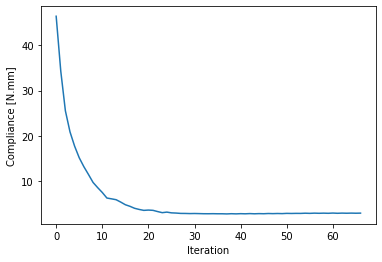

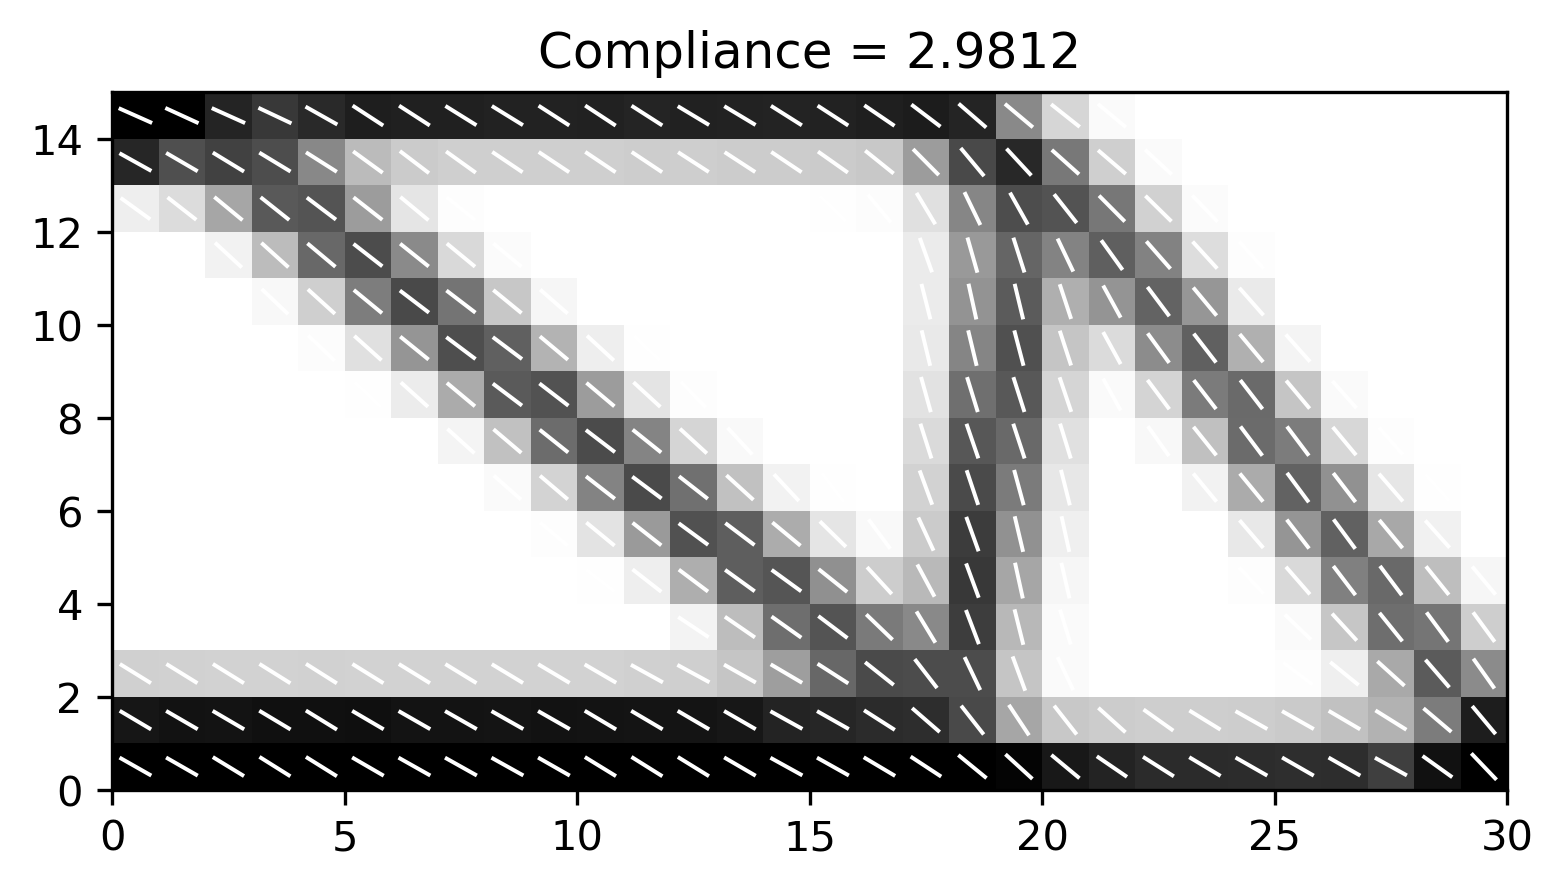

In [36]:
post7 = PostProcessor(solver7)
post7.plot_convergence()
post7.plot()

CO2mat = (rhofiber*Vfiber*CO2fiber + rhomatrix*Vmatrix*CO2matrix)/rho # kgCO2/kg
print('CO2 footprint: {:.2f} kgCO2'.format(1000 * post7.CO2_footprint(rho, CO2mat, CO2veh)))

---

In [37]:
# Clear temporary files
import os, glob
for filename in glob.glob("file*"): os.remove(filename)
for filename in glob.glob("cleanup*"): os.remove(filename)
del filename